# **RECRUITMENT RATE PREDICTION CODE WITH EXPLAINATION**

In [2]:
import numpy as np
import pandas as pd
import os

# Check if the file exists:
file_path = '/content/Unstop_Dataset.xlsx'
if os.path.exists(file_path):
    print(f"File found at: {file_path}")
else:
    print(f"Error: File not found at: {file_path}")
    # Handle the error (e.g., ask the user to provide a different path)

# Try reading the file with openpyxl:
try:
    data = pd.read_excel(file_path, engine='openpyxl')
except OSError as e:
    print(f"Error reading file: {e}")
    # Handle the error (e.g., display a more user-friendly message)

File found at: /content/Unstop_Dataset.xlsx


In [ ]:
data1 = data.drop(['Study URL','Locations','Other IDs','Collaborators','Sponsor','Start Date','Primary Completion Date','Other Outcome Measures'],axis='columns')
# Count NaN or empty values in each column
nan_count = data1.isna().sum()  # Counts the NaN values in each column
empty_count = (data1 == '').sum()  # Counts the empty string values in each column

# Combine the NaN and empty count
total_missing = nan_count + empty_count

# Display the count of missing or empty values for each column
print(total_missing)

In [ ]:
# Step 1: Split combined categories into lists
data1['Phases_split'] = data1['Phases'].str.split('|')

# Step 2: Explode the lists into separate rows
data1_exploded = data1.explode('Phases_split')

# Step 3: Add binary columns for each unique category
data1_exploded['Phase1'] = (data1_exploded['Phases_split'] == 'PHASE1').astype(int)
data1_exploded['Phase2'] = (data1_exploded['Phases_split'] == 'PHASE2').astype(int)
data1_exploded['Phase3'] = (data1_exploded['Phases_split'] == 'PHASE3').astype(int)

# Step 4: Aggregate the binary columns back to the original structure
binary_columns = ['Phase1', 'Phase2', 'Phase3']
data1_binary = data1_exploded.groupby(level=0)[binary_columns].max()

# Step 5: Merge the binary columns back into the original dataset
data1 = data1.merge(data1_binary, left_index=True, right_index=True)

# Step 6: Drop intermediate columns if necessary
data1 = data1.drop(columns=['Phases_split'])

# Display the updated dataset
data1.head(3)

In [14]:
data1.drop(['Phases'],axis='columns',inplace=True)
data1.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures', 'Sex', 'Age',
       'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Completion Date', 'First Posted', 'Results First Posted',
       'Last Update Posted', 'Study Recruitment Rate', 'Duration of Trial',
       'Primary Completion Duration of Trial', 'Phase1', 'Phase2', 'Phase3'],
      dtype='object')

In [16]:
# Step 1: Split combined categories into lists and remove any leading/trailing spaces
data1['Age_split'] = data1['Age'].str.split(',').apply(lambda x: [item.strip() for item in x])

# Step 2: Explode the lists into separate rows
data1_exploded = data1.explode('Age_split')

# Step 3: Add binary columns for each unique category
data1_exploded['Age_CHILD'] = (data1_exploded['Age_split'] == 'CHILD').astype(int)
data1_exploded['Age_ADULT'] = (data1_exploded['Age_split'] == 'ADULT').astype(int)
data1_exploded['Age_OLDER_ADULT'] = (data1_exploded['Age_split'] == 'OLDER_ADULT').astype(int)

# Step 4: Aggregate the binary columns back to the original structure
binary_columns = ['Age_CHILD', 'Age_ADULT', 'Age_OLDER_ADULT']
data1_binary = data1_exploded.groupby(level=0)[binary_columns].max()

# Step 5: Merge the binary columns back into the original dataset
data1 = data1.merge(data1_binary, left_index=True, right_index=True)

# Step 6: Drop intermediate columns if necessary
data1 = data1.drop(columns=['Age_split'])

# Display the updated dataset
data1.head(3)


,NCT Number,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sex,...,Last Update Posted,Study Recruitment Rate,Duration of Trial,Primary Completion Duration of Trial,Phase1,Phase2,Phase3,Age_CHILD,Age_ADULT,Age_OLDER_ADULT
0,NCT00900809,QUILT-3.018: Neukoplastâ„¢ (NK-92) for the Tre...,COMPLETED,NK cells from patients with malignant diseases...,NO,Acute Myeloid Leukemia,BIOLOGICAL: Neukoplastâ„¢ (NK-92),Determine the safety / maximum tolerated dose ...,Evaluate the therapeutic efficacy of Neukoplas...,ALL,...,2022-04-05,0.551598,386,386.0,1,0,0,0,1,1
1,NCT01113515,Clinical Investigation of GalnobaxÂ® for the T...,COMPLETED,The purpose of this study is to determine safe...,YES,Diabetic Foot Ulcer,DRUG: Esmolol hydrochloride|DRUG: Esmolol hydr...,"Safety Outcome, Number of participant with adv...","Efficacy Outcome, To evaluate the percent chan...",ALL,...,2024-05-20,0.443157,604,492.0,1,1,0,0,1,1
2,NCT01288573,A Combined Study in Pediatric Cancer Patients ...,COMPLETED,This is a multi-site study with plerixafor in ...,NO,Ewing's Sarcoma/Soft Tissue Sarcoma|Neuroblast...,DRUG: plerixafor|DRUG: plerixafor|DRUG: plerix...,Proportion of patients achieving at least a do...,Number of days of apheresis required to reach ...,ALL,...,2017-05-16,0.044558,1163,1163.0,1,1,0,1,1,0


In [17]:
data1=data1.drop(['Study Type','Last Update Posted','Results First Posted','First Posted','Funder Type'],axis='columns')

In [19]:
target = data1['Study Recruitment Rate']

In [20]:
import pandas as pd
import numpy as np

# Example range for binning (e.g., every 5 units within the target variable's range)
bin_width = 10  # You can adjust this as needed
bins = np.arange(data1['Study Recruitment Rate'].min(), data1['Study Recruitment Rate'].max() + bin_width, bin_width)

# Create bins and categorize the target variable
data1['Cluster'] = pd.cut(data1['Study Recruitment Rate'], bins=bins, right=False)

# Count the number of data points in each cluster
cluster_counts = data1['Cluster'].value_counts().sort_index()

# Display the clusters
print(cluster_counts.head(15))

Cluster
[0.00113, 10.001)     17665
[10.001, 20.001)       1645
[20.001, 30.001)        594
[30.001, 40.001)        283
[40.001, 50.001)        143
[50.001, 60.001)         80
[60.001, 70.001)         75
[70.001, 80.001)         44
[80.001, 90.001)         15
[90.001, 100.001)        19
[100.001, 110.001)       18
[110.001, 120.001)       10
[120.001, 130.001)        3
[130.001, 140.001)        3
[140.001, 150.001)        7
Name: count, dtype: int64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

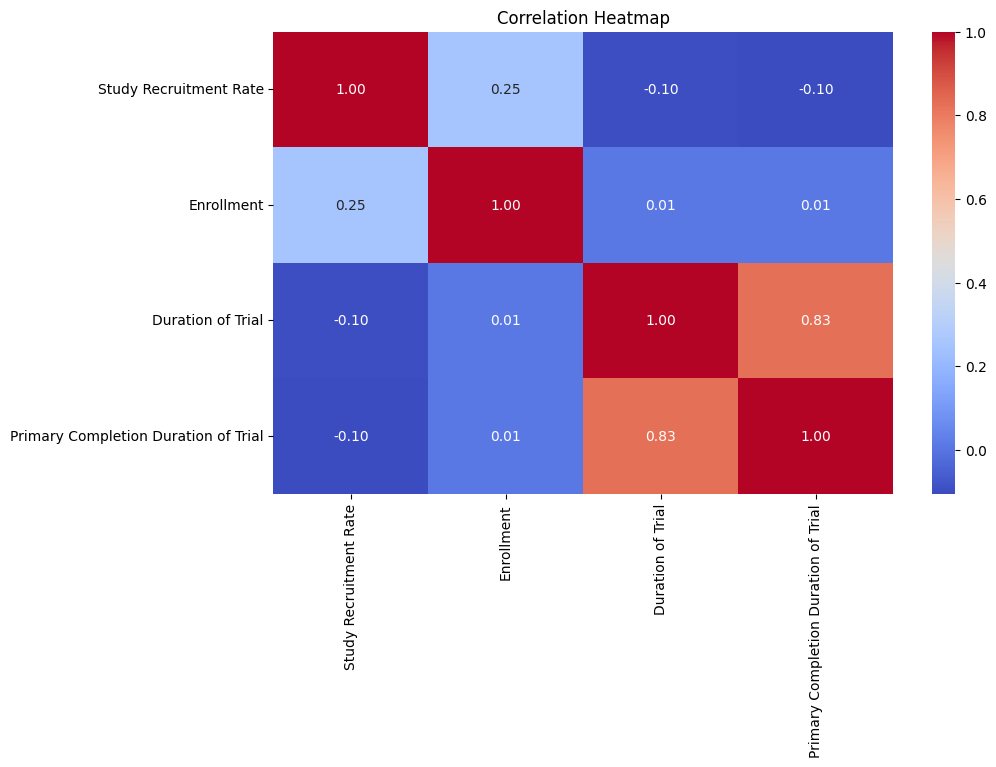

In [24]:
numerical_cols = ['Study Recruitment Rate', 'Enrollment', 'Duration of Trial', 'Primary Completion Duration of Trial']
# Replace 'Primary Duration of Trial' with 'Primary Completion Duration of Trial'

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data1[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [27]:
# Adjust pandas display options to prevent truncation
pd.set_option('display.max_colwidth', None)

# Print the full value of the 'Study Design' column for the first 4 rows
data1['Study Design'].head(4)

,Study Design
0,Allocation: NA|Intervention Model: SINGLE_GROUP|Masking: NONE|Primary Purpose: TREATMENT
1,"Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: TRIPLE (PARTICIPANT, CARE_PROVIDER, INVESTIGATOR)|Primary Purpose: TREATMENT"
2,Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT
3,"Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: QUADRUPLE (PARTICIPANT, CARE_PROVIDER, INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT"


In [28]:
# Split the 'System Design' column into multiple components using | as a separator
split_columns = data1['Study Design'].str.split('|', expand=True)

# Extract the keys (e.g., "Allocation", "Intervention Model") and their values
for col in split_columns.columns:
    key_value = split_columns[col].str.split(':', expand=True)
    key = key_value[0].str.strip()  # Extract the key and strip any whitespace
    value = key_value[1].str.strip()  # Extract the value and strip any whitespace
    data1[key[0]] = value

# Drop the original 'System Design' column after splitting
data1 = data1.drop(columns=['Study Design'])

In [29]:
# Reset pandas display options to default for max_colwidth
pd.reset_option('display.max_colwidth')

data1.head(3)

,NCT Number,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sex,...,Phase2,Phase3,Age_CHILD,Age_ADULT,Age_OLDER_ADULT,Cluster,Allocation,Intervention Model,Masking,Primary Purpose
0,NCT00900809,QUILT-3.018: Neukoplastâ„¢ (NK-92) for the Tre...,COMPLETED,NK cells from patients with malignant diseases...,NO,Acute Myeloid Leukemia,BIOLOGICAL: Neukoplastâ„¢ (NK-92),Determine the safety / maximum tolerated dose ...,Evaluate the therapeutic efficacy of Neukoplas...,ALL,...,0,0,0,1,1,"[0.00113, 10.001)",NA,SINGLE_GROUP,NONE,TREATMENT
1,NCT01113515,Clinical Investigation of GalnobaxÂ® for the T...,COMPLETED,The purpose of this study is to determine safe...,YES,Diabetic Foot Ulcer,DRUG: Esmolol hydrochloride|DRUG: Esmolol hydr...,"Safety Outcome, Number of participant with adv...","Efficacy Outcome, To evaluate the percent chan...",ALL,...,1,0,0,1,1,"[0.00113, 10.001)",RANDOMIZED,PARALLEL,"TRIPLE (PARTICIPANT, CARE_PROVIDER, INVESTIGATOR)",TREATMENT
2,NCT01288573,A Combined Study in Pediatric Cancer Patients ...,COMPLETED,This is a multi-site study with plerixafor in ...,NO,Ewing's Sarcoma/Soft Tissue Sarcoma|Neuroblast...,DRUG: plerixafor|DRUG: plerixafor|DRUG: plerix...,Proportion of patients achieving at least a do...,Number of days of apheresis required to reach ...,ALL,...,1,0,1,1,0,"[0.00113, 10.001)",RANDOMIZED,PARALLEL,NONE,TREATMENT


In [30]:
# Convert 'Study Results' column to binary (1 for YES, 0 for NO)
data1['Study Results'] = data1['Study Results'].map({'YES': 1, 'NO': 0})

# Display the updated column
print(data1['Study Results'].head())

0    0
1    1
2    0
3    0
4    1
Name: Study Results, dtype: int64


In [31]:
# Define the mapping for Study Status
status_mapping = {
    "UNKNOWN": 0,
    "NOT_YET_RECRUITING": 1,
    "ACTIVE_NOT_RECRUITING": 2,
    "ENROLLING_BY_INVITATION": 3,
    "RECRUITING": 4,
    "SUSPENDED": 5,
    "TERMINATED": 6,
    "COMPLETED": 7

}

# Apply the mapping to the 'Study Status' column
data1['Study Status'] = data1['Study Status'].map(status_mapping)


In [32]:
data1.head(3)

,NCT Number,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sex,...,Phase2,Phase3,Age_CHILD,Age_ADULT,Age_OLDER_ADULT,Cluster,Allocation,Intervention Model,Masking,Primary Purpose
0,NCT00900809,QUILT-3.018: Neukoplastâ„¢ (NK-92) for the Tre...,7,NK cells from patients with malignant diseases...,0,Acute Myeloid Leukemia,BIOLOGICAL: Neukoplastâ„¢ (NK-92),Determine the safety / maximum tolerated dose ...,Evaluate the therapeutic efficacy of Neukoplas...,ALL,...,0,0,0,1,1,"[0.00113, 10.001)",NA,SINGLE_GROUP,NONE,TREATMENT
1,NCT01113515,Clinical Investigation of GalnobaxÂ® for the T...,7,The purpose of this study is to determine safe...,1,Diabetic Foot Ulcer,DRUG: Esmolol hydrochloride|DRUG: Esmolol hydr...,"Safety Outcome, Number of participant with adv...","Efficacy Outcome, To evaluate the percent chan...",ALL,...,1,0,0,1,1,"[0.00113, 10.001)",RANDOMIZED,PARALLEL,"TRIPLE (PARTICIPANT, CARE_PROVIDER, INVESTIGATOR)",TREATMENT
2,NCT01288573,A Combined Study in Pediatric Cancer Patients ...,7,This is a multi-site study with plerixafor in ...,0,Ewing's Sarcoma/Soft Tissue Sarcoma|Neuroblast...,DRUG: plerixafor|DRUG: plerixafor|DRUG: plerix...,Proportion of patients achieving at least a do...,Number of days of apheresis required to reach ...,ALL,...,1,0,1,1,0,"[0.00113, 10.001)",RANDOMIZED,PARALLEL,NONE,TREATMENT


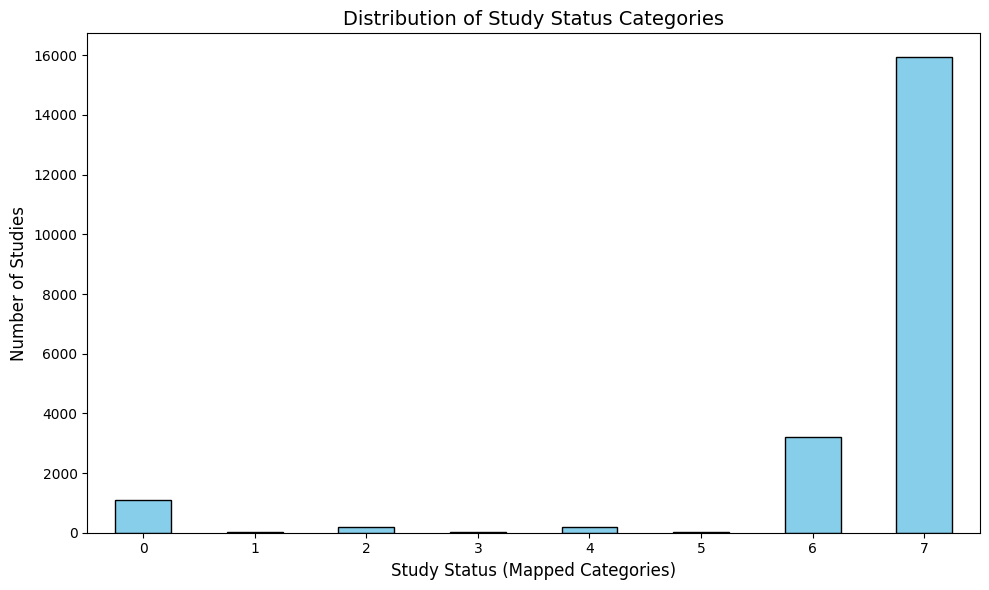

In [33]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each category
status_counts = data1['Study Status'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Distribution of Study Status Categories', fontsize=14)
plt.xlabel('Study Status (Mapped Categories)', fontsize=12)
plt.ylabel('Number of Studies', fontsize=12)
plt.xticks(ticks=range(len(status_counts)), labels=status_counts.index, rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


In [35]:
import re

# Define the cleaning function
def clean_text_for_biobert(text):
    # Remove numeric values
    text = re.sub(r'\b\d+\b', '', text)
    # Remove special characters like "â„¢"
    text = re.sub(r'[^\w\s]', '', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase
    text = text.lower().strip()
    return text

# Step 1: Apply the cleaning function to each column
data1['Primary Outcome filtered'] = data1['Primary Outcome Measures'].apply(clean_text_for_biobert)


In [37]:
import pandas as pd
import re

# Define the cleaning function
def clean_text_for_biobert(text):
    if pd.isna(text):  # Check if the value is NaN
        return ""
    # Remove numeric values
    text = re.sub(r'\b\d+\b', '', str(text))  # Ensure the value is a string
    # Remove special characters like "â„¢"
    text = re.sub(r'[^\w\s]', '', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase
    text = text.lower().strip()
    return text

# Apply the cleaning function to each column
data1['Secondary Outcome filtered'] = data1['Secondary Outcome Measures'].apply(clean_text_for_biobert)

In [39]:
# Define a function for conditional merging
def merge_outcomes(secondary, primary):
    if secondary and primary:  # Both columns have non-blank values
        return f"{secondary} || {primary}"
    elif secondary:  # Only the secondary column has a value
        return secondary
    elif primary:  # Only the primary column has a value
        return primary
    else:  # Both are blank
        return ""

# Apply the function to create the merged column
data1['Merged Outcome'] = data1.apply(
    lambda row: merge_outcomes(row['Secondary Outcome filtered'], row['Primary Outcome filtered']),
    axis=1
)


In [41]:
data1.drop(['Primary Outcome filtered','Secondary Outcome filtered'],axis='columns',inplace=True)

In [44]:
# Replace NaN values with "Not Applicable"
data1[['Allocation', 'Intervention Model', 'Masking']] = data1[['Allocation', 'Intervention Model', 'Masking']].fillna('Not Applicable')

# Replace blank values with "Unknown"
data1[['Allocation', 'Intervention Model', 'Masking']] = data1[['Allocation', 'Intervention Model', 'Masking']].replace(r'^\s*$', 'Unknown', regex=True)


In [46]:
# Count NaN or empty values in each column
nan_count = data1.isna().sum()  # Counts the NaN values in each column
empty_count = (data1 == '').sum()  # Counts the empty string values in each column

# Combine the NaN and empty count
total_missing = nan_count + empty_count

# Filter to show only columns with non-zero missing or empty values
non_zero_missing = total_missing[total_missing > 0]

# Display the count of missing or empty values for these columns
print(non_zero_missing)

Secondary Outcome Measures              2919
Sex                                        6
Completion Date                            1
Primary Completion Duration of Trial      46
dtype: int64


In [49]:
# Drop the specified columns
data1 = data1.drop(columns=['Primary Outcome Measures', 'Secondary Outcome Measures'])

In [51]:
# Check the total number of rows in the dataset before dropping
total_rows = len(data1)

# Count the number of missing values in the 'Sex' column
missing_sex_count = data1['Sex'].isna().sum()

# Calculate the proportion of rows with missing 'Sex' values
missing_proportion = (missing_sex_count / total_rows) * 100
print(f"Total Rows: {total_rows}")
print(f"Rows with Missing 'Sex': {missing_sex_count}")
print(f"Proportion of Missing 'Sex': {missing_proportion:.2f}%")

# Decide to drop rows if the proportion is insignificant
if missing_proportion < 5:  # For example, drop only if less than 5% of data is missing
    data1 = data1.dropna(subset=['Sex'])
    print("Rows with missing 'Sex' values dropped.")
else:
    print("Too many missing values in 'Sex'. Consider alternative handling methods.")

# Check the total number of rows after dropping
new_total_rows = len(data1)
print(f"Rows after dropping: {new_total_rows}")


Total Rows: 20676
Rows with Missing 'Sex': 6
Proportion of Missing 'Sex': 0.03%
Rows with missing 'Sex' values dropped.
Rows after dropping: 20670


In [53]:
# Drop rows where the column 'Sex' has missing values
data1 = data1.dropna(subset=['Sex'])

In [54]:
# Count NaN or empty values in each column
nan_count = data1.isna().sum()  # Counts the NaN values in each column
empty_count = (data1 == '').sum()  # Counts the empty string values in each column

# Combine the NaN and empty count
total_missing = nan_count + empty_count

# Filter to show only columns with non-zero missing or empty values
non_zero_missing = total_missing[total_missing > 0]

# Display the count of missing or empty values for these columns
print(non_zero_missing)

Completion Date                          1
Primary Completion Duration of Trial    46
dtype: int64


In [56]:
# Drop rows with missing values in the specified column
data1 = data1.dropna(subset=['Primary Completion Duration of Trial'])


In [57]:
data1.drop(['Completion Date'],axis='columns',inplace=True)

<ipython-input-57-9026e5ac341e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop(['Completion Date'],axis='columns',inplace=True)


In [58]:
# Drop rows with missing values in the specified column
data1 = data1.dropna(subset=['Primary Completion Duration of Trial'])

In [59]:
# Count NaN or empty values in each column
nan_count = data1.isna().sum()  # Counts the NaN values in each column
empty_count = (data1 == '').sum()  # Counts the empty string values in each column

# Combine the NaN and empty count
total_missing = nan_count + empty_count

# Filter to show only columns with non-zero missing or empty values
non_zero_missing = total_missing[total_missing > 0]

# Check if there are any missing values
if non_zero_missing.empty:
    print("No missing or empty values in the data.")
else:
    # Display the count of missing or empty values for these columns
    print(non_zero_missing)

No missing or empty values in the data.


In [60]:
pd.set_option('display.max_colwidth', None)
data1['Interventions'].head(4)
pd.reset_option('display.max_colwidth')

In [64]:
data1.drop(['Cluster'],axis='columns',inplace=True)

In [66]:
# Declare textual and numerical columns
textual_cols = [
    'Study Title', 'Brief Summary', 'Conditions', 'Interventions',
    'Allocation', 'Intervention Model', 'Masking', 'Primary Purpose', 'Merged Outcome'
]

numerical_cols = [
    'Enrollment', 'Duration of Trial', 'Primary Completion Duration of Trial',
    'Phase1', 'Phase2', 'Phase3', 'Age_CHILD', 'Age_ADULT',
    'Age_OLDER_ADULT', 'Study Status', 'Study Results','Study Recruitment Rate'
]

In [67]:
from sklearn.model_selection import train_test_split
# Create a stratify column based on binned recruitment rates
data1['Binned Recruitment Rate'] = pd.qcut(data1['Study Recruitment Rate'], q=10, labels=False)

# Split data into training and testing sets using stratification
X = data1.drop(['Study Recruitment Rate', 'Binned Recruitment Rate'], axis=1)
y = data1['Study Recruitment Rate']
stratify_col = data1['Binned Recruitment Rate']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=stratify_col
)


In [68]:
# Combine textual columns into a single string for each row
X_train['combined_text'] = X_train[textual_cols].fillna('').agg(' '.join, axis=1)
X_test['combined_text'] = X_test[textual_cols].fillna('').agg(' '.join, axis=1)

In [ ]:
# Load BioBERT tokenizer and model
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
import gc

tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-v1.1")
biobert_model = AutoModel.from_pretrained("dmis-lab/biobert-v1.1")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
biobert_model.to(device)

# Function to generate embeddings in batches
def generate_embeddings_in_batches(text_data, batch_size=32):
    embeddings = []
    for i in range(0, len(text_data), batch_size):
        batch = text_data[i:i + batch_size]
        tokens = tokenizer(
            list(batch), padding=True, truncation=True, max_length=512, return_tensors="pt"
        )
        tokens = {key: val.to(device) for key, val in tokens.items()}
        with torch.no_grad():
            outputs = biobert_model(**tokens)
        batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings.append(batch_embeddings)
        del tokens, outputs
        gc.collect()
        torch.cuda.empty_cache()
    return np.vstack(embeddings)

# Generate embeddings for training and testing sets
X_train_embeddings = generate_embeddings_in_batches(X_train['combined_text'].values, batch_size=32)
X_test_embeddings = generate_embeddings_in_batches(X_test['combined_text'].values, batch_size=32)

# Save the embeddings
np.save('X_train_embeddings.npy', X_train_embeddings)
np.save('X_test_embeddings.npy', X_test_embeddings)


In [69]:
# Declare textual and numerical columns
textual_cols = [
    'Study Title', 'Brief Summary', 'Conditions', 'Interventions',
    'Allocation', 'Intervention Model', 'Masking', 'Primary Purpose', 'Merged Outcome'
]

numerical_cols = [
    'Enrollment', 'Duration of Trial', 'Primary Completion Duration of Trial',
    'Phase1', 'Phase2', 'Phase3', 'Age_CHILD', 'Age_ADULT',
    'Age_OLDER_ADULT', 'Study Status', 'Study Results'
]

In [70]:
# Extract the normalized numerical features
X_train_numerical = X_train[numerical_cols].values
X_test_numerical = X_test[numerical_cols].values

# Verify the shapes
print("X_train_numerical shape:", X_train_numerical.shape)
print("X_test_numerical shape:", X_test_numerical.shape)


X_train_numerical shape: (16499, 11)
X_test_numerical shape: (4125, 11)


In [71]:
X_train_embeddings=np.load('/content/X_train_embeddings.npy')
X_test_embeddings=np.load('/content/X_test_embeddings.npy')
# Combine BioBERT embeddings with numerical features
X_train_combined = np.hstack([X_train_embeddings, X_train_numerical])
X_test_combined = np.hstack([X_test_embeddings, X_test_numerical])

# Save combined features
np.save('X_train_combined.npy', X_train_combined)
np.save('X_test_combined.npy', X_test_combined)


In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

# Define the feature columns and the target variable
numerical_cols = [
    'Enrollment', 'Duration of Trial', 'Primary Completion Duration of Trial',
    'Phase1', 'Phase2', 'Phase3', 'Age_CHILD', 'Age_ADULT',
    'Age_OLDER_ADULT', 'Study Status', 'Study Results'
]
target_col = 'Study Recruitment Rate'

# Initialize scalers
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

# Standardize the features
X_train_combined = feature_scaler.fit_transform(X_train_combined)
X_test_combined = feature_scaler.transform(X_test_combined)


y_train_scaled = np.log1p(y_train.values.reshape(-1, 1))
y_test_scaled = np.log1p(y_test.values.reshape(-1, 1))

# Standardize the target variable
target = data1['Study Recruitment Rate']
target = target_scaler.fit_transform(target.values.reshape(-1, 1))


In [74]:
!pip install bayesian-optimization

# Bayesian Optimization for Hyperparameter Tuning

In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import shap
import lightgbm as lgb
from bayes_opt import BayesianOptimization
import torch

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Step 1: Define the Objective Function for Bayesian Optimization
def gbm_objective(n_estimators, learning_rate, max_depth, subsample):
    model = GradientBoostingRegressor(
        n_estimators=int(n_estimators),
        learning_rate=learning_rate,
        max_depth=int(max_depth),
        subsample=subsample,
        random_state=42
    )
    model.fit(X_train_combined, y_train_scaled.ravel())
    y_pred = model.predict(X_test_combined)
    rmse = np.sqrt(mean_squared_error(y_test_scaled.ravel(), y_pred))
    return -rmse  # Negative because BayesianOptimization maximizes

# Step 2: Set Parameter Bounds for Optimization
param_bounds = {
    'n_estimators': (100, 250),
    'learning_rate': (0.05, 0.2),
    'max_depth': (3, 8),
    'subsample': (0.6, 1.0)
}

# Step 3: Perform Bayesian Optimization
optimizer = BayesianOptimization(
    f=gbm_objective,
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

print("Optimizing Gradient Boosting Model...")
optimizer.maximize(init_points=10, n_iter=10)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Using device: cpu
Optimizing Gradient Boosting Model...
|   iter    |  target   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------
| 1         | -0.4918   | 0.1062    | 7.754     | 209.8     | 0.8395    |
| 2         | -0.5137   | 0.0734    | 3.78      | 108.7     | 0.9465    |
| 3         | -0.495    | 0.1402    | 6.54      | 103.1     | 0.988     |
| 4         | -0.5072   | 0.1749    | 4.062     | 127.3     | 0.6734    |
| 5         | -0.4954   | 0.09564   | 5.624     | 164.8     | 0.7165    |
| 6         | -0.5107   | 0.1418    | 3.697     | 143.8     | 0.7465    |
| 7         | -0.4964   | 0.1184    | 6.926     | 130.0     | 0.8057    |
| 8         | -0.5045   | 0.1389    | 3.232     | 191.1     | 0.6682    |
| 9         | -0.4793   | 0.05976   | 7.744     | 244.8     | 0.9234    |


KeyboardInterrupt: 

KeyboardInterrupt: 

In [76]:
# Save NCT Number for mapping predictions later
X_test_nct_number = X_test['NCT Number'].values  # Save NCT Number column from X_test

In [ ]:
import pickle

# Find the model with the lowest RMSE (Rescaled)
best_model_name = min(results, key=lambda x: results[x]['RMSE (Scaled)'])
best_model_standard = models[best_model_name]

# Save the best model as gbm_model.pkl
with open('gbm_model.pkl', 'wb') as file:
    pickle.dump(best_model_standard, file)

print(f"The best model is {best_model_name} with RMSE (Scaled): {results[best_model_name]['RMSE (Scaled)']:.4f}")
print(f"The best model is {best_model_name} with RMSE: {results[best_model_name]['RMSE']:.4f}")
print(f"The model has been saved as gbm_model.pkl")

The best model is Gradient Boosting with RMSE (Scaled): 15.9883
The best model is Gradient Boosting with RMSE: 0.3071
The model has been saved as gbm_model.pkl
